In [3]:
import pandas as pd
import numpy as np

# df = pd.read_csv('data/gb1/gb1_ddg_percentile_0.0_0.4_99value.csv')
df = pd.read_csv('data/gb1/ground_truth_gb1_ddg.csv')
gb1 = df['gb1'].values
ddg = df['ddg'].values
gb1_stats = [np.mean(gb1), np.median(gb1), np.quantile(gb1, 0.25), np.quantile(gb1, 0.75), np.min(gb1), np.max(gb1)]
ddg_stats = [np.mean(ddg), np.median(ddg), np.quantile(ddg, 0.25), np.quantile(ddg, 0.75), np.min(ddg), np.max(ddg)]
print('gb1_stats:', gb1_stats)
print('ddg_stats:', ddg_stats)
ratio = [ddg_stats[i]/gb1_stats[i] for i in range(len(gb1_stats))]
print('ratio:', ratio)

gb1_stats: [0.08050968517384413, 0.00338374487421, 0.00137041667406, 0.00898633884627, 0.0, 8.76196565571]
ddg_stats: [27.065790811134967, 24.5459, 17.8009, 34.0362, -2.50515, 116.583]
ratio: [336.18055706828255, 7254.063445232617, 12989.407044547266, 3787.549143456521, -inf, 13.305576006683518]


/tmp/ipykernel_1572274/1127697156.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [ddg_stats[i]/gb1_stats[i] for i in range(len(gb1_stats))]


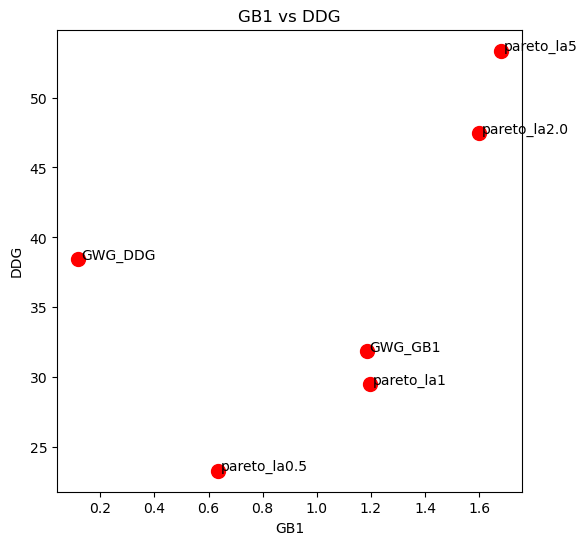

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

def load_metric_point_label(csv_path, label):
    df = pd.read_csv(csv_path)
    metrics = df['mean'].values[:2]
    x = metrics[0]
    y = metrics[1]
    
    return x, y, label

gb1_ddg_labels = []
gb1_ddg_labels.append(load_metric_point_label('logs_new/train_predictor_gb1_0_0.4_2023_10_05__15_12_17_augment/samples_20231005-163504/evaluation_metrics.csv', 
                                              'GWG_GB1'))
gb1_ddg_labels.append(load_metric_point_label('logs_new/train_predictor_ddg_0_0.4_2023_10_05__15_12_56_agument/samples_20231005-163745/evaluation_metrics.csv', 
                                              'GWG_DDG'))
gb1_ddg_labels.append(load_metric_point_label('logs_new/GWG_2_gb1_ddg_2023_10_05__21_58_09_debug/samples_20231005-215809/evaluation_metrics.csv', 
                                              'pareto_la1'))
gb1_ddg_labels.append(load_metric_point_label('logs_new/GWG_2_gb1_ddg_2023_10_06__10_33_21_lambda5/samples_20231006-103321/evaluation_metrics.csv',
                                              'pareto_la5'))
gb1_ddg_labels.append(load_metric_point_label('logs_new/GWG_2_gb1_ddg_2023_10_06__10_36_17_lambda0.5/samples_20231006-103617/evaluation_metrics.csv',
                                              'pareto_la0.5'))
gb1_ddg_labels.append(load_metric_point_label('logs_new/GWG_2_gb1_ddg_2023_10_06__10_40_58_lambda2.0/samples_20231006-104058/evaluation_metrics.csv',
                                              'pareto_la2.0'))
gb1, ddg, labels = zip(*gb1_ddg_labels)

plt.figure(figsize=(6, 6), dpi=100)
plt.scatter(gb1, ddg, c='r', marker='o', s=100)
for i in range(len(labels)):
    plt.annotate(labels[i], (gb1[i], ddg[i]), xytext=(gb1[i]+0.01, ddg[i]+0.01))
plt.xlabel('GB1')
plt.ylabel('DDG')
plt.title('GB1 vs DDG')
plt.show()

In [7]:
wt = 'MANVEKMSVAVTPQQAAVMREAVEAGEYATASEIVREAVRDWLAKRELRHDDIRRLRQLWDEGKASGRPEPVDFDALRKEARQKLTEVPPNGR'
wt[60], wt[63], wt[79]

('D', 'K', 'E')

In [5]:
csv_path = '/work/kerr/p450/mutation/results/ParD3/df_gt.csv'
import pandas as pd
df = pd.read_csv(csv_path)
mutations = df['full_mut'].tolist()
seqs = []
for muts in mutations:
    muts = muts.split(':')
    muts = [m[-1] for m in muts]
    muts[0] = muts[0] if muts[0] != '_' else 'D'
    muts[1] = muts[1] if muts[1] != '_' else 'K'
    muts[2] = muts[2] if muts[2] != '_' else 'E'
    seqs.append(''.join(muts))
print(len(seqs), len(set(seqs)))

9261 8000


In [9]:
import pandas as pd

df = pd.read_csv('data/ParD3/ground_truth_ParD3.csv')
seqs = df['sequence'].tolist()
len(set(seqs))

8000